Inspired by /content/drive/MyDrive/Colab Notebooks/Courses/Python-Finance-QuantConnect/03-Useful-Methods.ipynb

## Creating DataFrames

In [ ]:
import pandas as pd
import numpy as np

np.random.seed(101)
mydata = np.random.randint(0,101,(4,6))
myindex = ['SG','MY','US','UK']
mycolumns = ['Jan','Feb','Mar','Apr','May','Jun']
rainfall = pd.DataFrame(data=mydata,index=myindex,columns=mycolumns)
# df = pd.DataFrame({"A": [10,20,30], "B": [20, 30, 10]})
# Note: if inputs are Series, use pd.concat() instead

neworder = [0,2,4,1,3,3,5]
newcols = [rainfall.columns[i] for i in neworder]
rainfall

,Jan,Feb,Mar,Apr,May,Jun
SG,95,11,81,70,63,87
MY,75,9,77,40,4,63
US,40,60,92,64,5,12
UK,93,40,49,83,8,29


Qn: How is (axis=0) related to the shape of the dataframe?

In [ ]:
rainfall.mean(axis=0)

Jan    75.75
Feb    30.00
Mar    74.75
Apr    64.25
May    20.00
Jun    47.75
dtype: float64

In [ ]:
rainfall.shape

(4, 6)

## Using .apply()

In [ ]:
def rainpict(a):
  if a>70:
    return "'''"
  elif a<20:
    return "'"
  else:
    return "''"

In [ ]:
rainfall['Jun'].apply(rainpict)

SG    '''
MY     ''
US      '
UK     ''
Name: Jun, dtype: object

In [ ]:
rainfall[['May','Jun']].apply(lambda a,b: a+b)

TypeError: ignored

## Using `matplotlib`

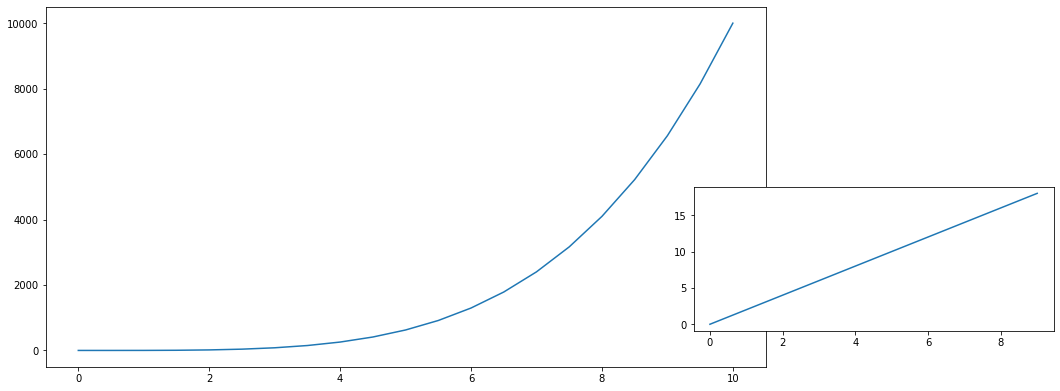

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0,10)
y = 2 * x

a = np.linspace(0,10,21)
b = a ** 4

# Create Figure (empty canvas)
fig = plt.figure(figsize=(10,5))

# Add set of axes to figure
axes1 = fig.add_axes([0,0,1,1]) # left, bottom, width, height (range 0 to 1)

# Plot on that set of axes
axes1.plot(a, b)

axes2 = fig.add_axes([.9,.1,.5,.4])
axes2.plot(x, y)

plt.show()

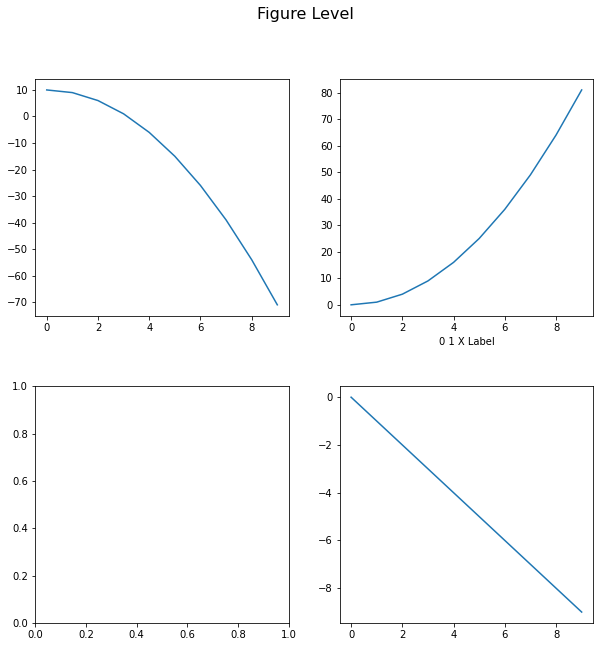

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(10,10))
ax[0][0].plot(x,10-x**2)
ax[0][1].plot(x,x**2)
ax[1][1].plot(x,-x)
ax[0][1].set_xlabel('0 1 X Label')

fig.subplots_adjust(hspace=0.3)
fig.suptitle("Figure Level",fontsize=16);

## Using `yfinance`

[*********************100%***********************]  28 of 28 completed


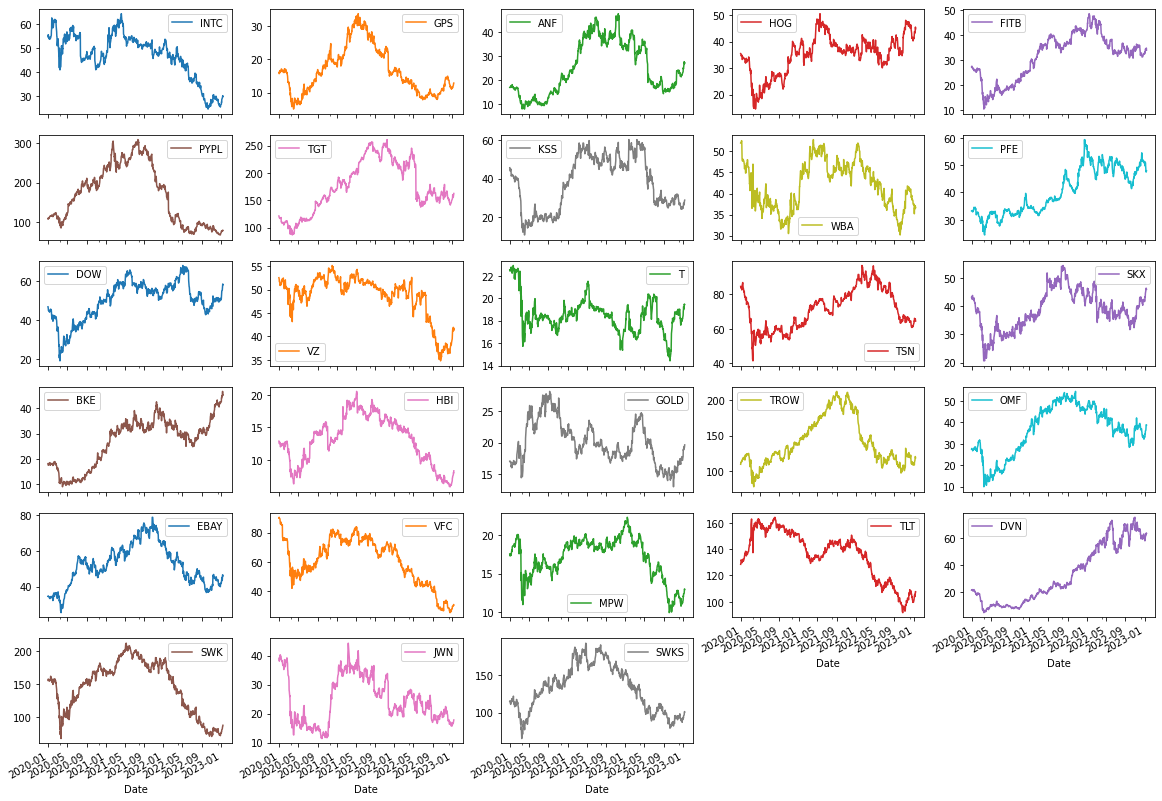

In [3]:
# !pip install yfinance
import yfinance as yf

start = '2019-12-31'
end = '2021-08-28'

tickers = 'INTC,GPS,ANF,HOG,FITB,PYPL,TGT,KSS,WBA,PFE,DOW,VZ,T,TSN,SKX,BKE,HBI,GOLD,TROW,OMF,EBAY,VFC,MPW,TLT,DVN,SWK,JWN,SWKS'.split(',')
data = yf.download(tickers, start)['Adj Close'][tickers]
data.plot(subplots=True, layout=(7,5), figsize=(20,15), sharey=False, logy=False);

[*********************100%***********************]  20 of 20 completed


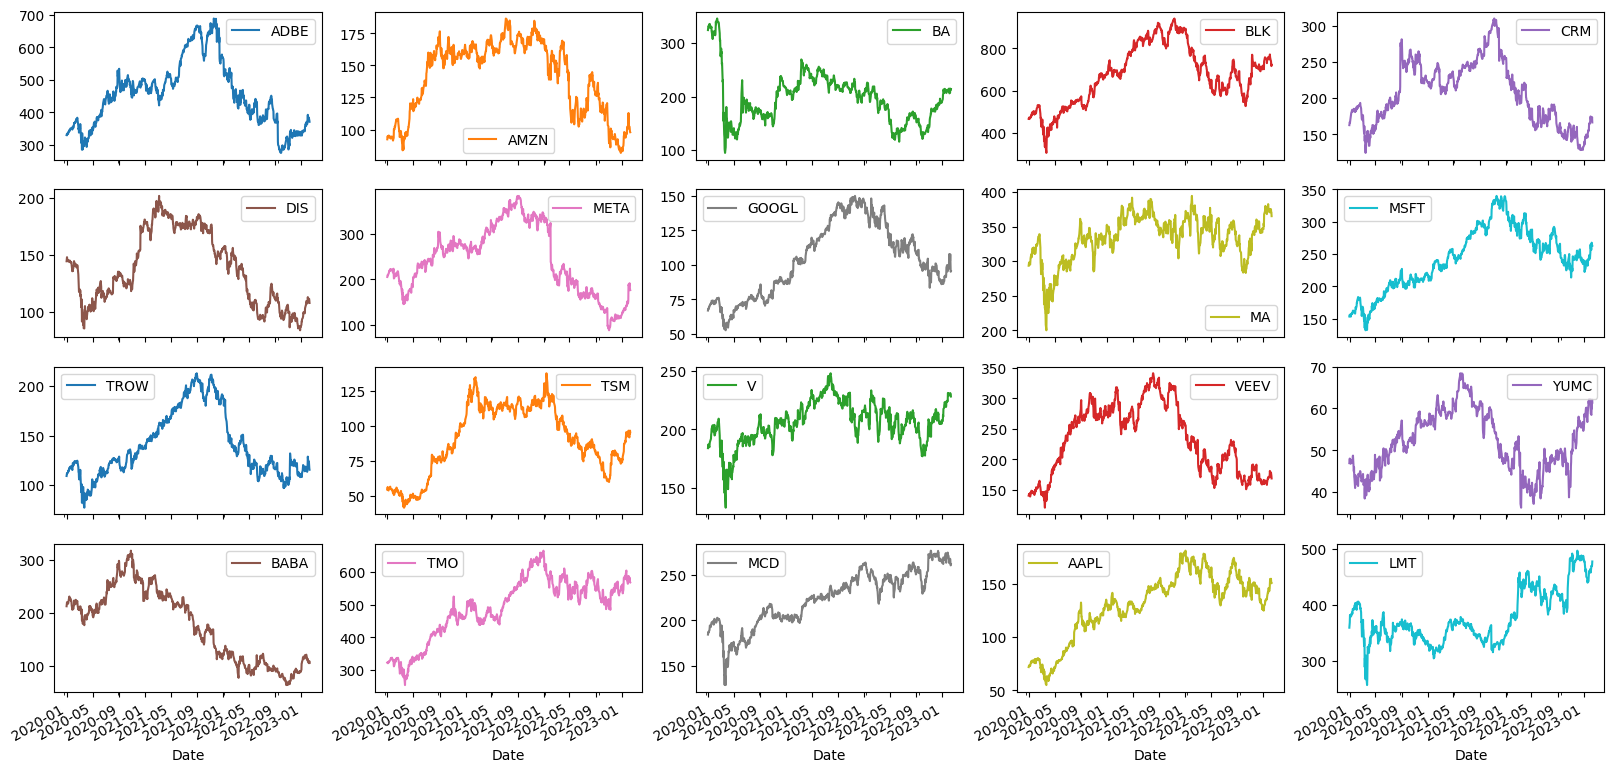

In [2]:
# !pip install yfinance
import yfinance as yf

start = '2019-12-31'
end = '2021-08-28'

tickers = 'ADBE,AMZN,BA,BLK,CRM,DIS,META,GOOGL,MA,MSFT,TROW,TSM,V,VEEV,YUMC,BABA,TMO,MCD,AAPL,LMT'.split(',')
data = yf.download(tickers, start)['Adj Close'][tickers]
data.plot(subplots=True, layout=(4,5), figsize=(20,10), sharey=False, logy=False);

In [ ]:
daily_ret = data.pct_change().dropna()

# daily_ret

In [ ]:
sharpe = daily_ret.mean() / daily_ret.std() * 252**.5
sortino = daily_ret.mean() / daily_ret[daily_ret<0].std() * 252**.5
pd.concat([sharpe, sortino], axis=1, keys=['sharpe','sortino']).corr()

,sharpe,sortino
sharpe,1.000000,0.994766
sortino,0.994766,1.000000


## Using `fundamentalanalysis`
The `fundamentalanalysis` package provides a lot of annual data at the free tier.

In [ ]:
# !pip install fundamentalanalysis
import fundamentalanalysis as fa

ticker = "TSLA"
api_key = "4476815eb0031e5d572664c09df8af93"

# Show the available companies
companies = fa.available_companies(api_key)

# Collect general company information
profile = fa.profile(ticker, api_key)

# Collect recent company quotes
quotes = fa.quote(ticker, api_key)

# Collect market cap and enterprise value
entreprise_value = fa.enterprise(ticker, api_key)

# Show recommendations of Analysts
ratings = fa.rating(ticker, api_key)

# Obtain DCFs over time
dcf_annually = fa.discounted_cash_flow(ticker, api_key, period="annual")

# Collect the Balance Sheet statements
balance_sheet_annually = fa.balance_sheet_statement(ticker, api_key, period="annual")

# Collect the Income Statements
income_statement_annually = fa.income_statement(ticker, api_key, period="annual")

# Collect the Cash Flow Statements
cash_flow_statement_annually = fa.cash_flow_statement(ticker, api_key, period="annual")

# Show Key Metrics
key_metrics_annually = fa.key_metrics(ticker, api_key, period="annual")

# Show a large set of in-depth ratios
financial_ratios_annually = fa.financial_ratios(ticker, api_key, period="annual")

# Show the growth of the company
growth_annually = fa.financial_statement_growth(ticker, api_key, period="annual")

# Download general stock data
stock_data = fa.stock_data(ticker, period="ytd", interval="1d")

# Download detailed stock data
stock_data_detailed = fa.stock_data_detailed(ticker, api_key, begin="2000-01-01", end="2020-01-01")

# Download dividend history
dividends = fa.stock_dividend(ticker, api_key, begin="2000-01-01", end="2020-01-01")


## Portfolio Calculations

In [ ]:
# !pip install yfinance
import yfinance as yf

start = '2016-09-06'
end = '2021-09-03'
data = yf.download(['COST', 'WMT', 'TGT', 'DG'], start, end)['Adj Close'][['COST', 'WMT', 'TGT', 'DG']]
# data.plot(subplots=True, layout=(2,2), figsize=(20,5), sharey=False, logy=False);

# Calculating pct_change and cumulative pct_change
df2 = data.pct_change()
df3 = (1 + df2).cumprod() - 1
# df3.plot(figsize=(20,5));

[*********************100%***********************]  4 of 4 completed


In [ ]:
import numpy as np
import pandas as pd

# Calculating log change
df4 = np.log(data).diff()
df5 = np.log(data) - np.log(data.iloc[0])

# pd.concat([df3,df5], axis=1)
df = pd.concat([data,df2,df3,df4,df5], axis=1, keys=['Close', 'pct', 'pct_cum', 'log', 'log_cum']).dropna()

# Check
pd.concat({'pct':data.iloc[0] * (1 + df3.iloc[-1]), 'log':data.iloc[0] *np.exp(df5.iloc[-1]), 'actual':data.iloc[-1]}, axis=1).transpose()

,COST,WMT,TGT,DG
pct,457.166718,145.674347,239.896927,222.057877
log,457.166718,145.674347,239.896927,222.057877
actual,457.166718,145.674347,239.896927,222.057877


In [ ]:
N = len(df['Close'].columns)
equal_weights = N * [1/N]

def random_weights(N):
  weights = np.random.random(N)
  return weights/np.sum(weights)

# Check
# [np.sum(random_weights(N)) for _ in range(20)]

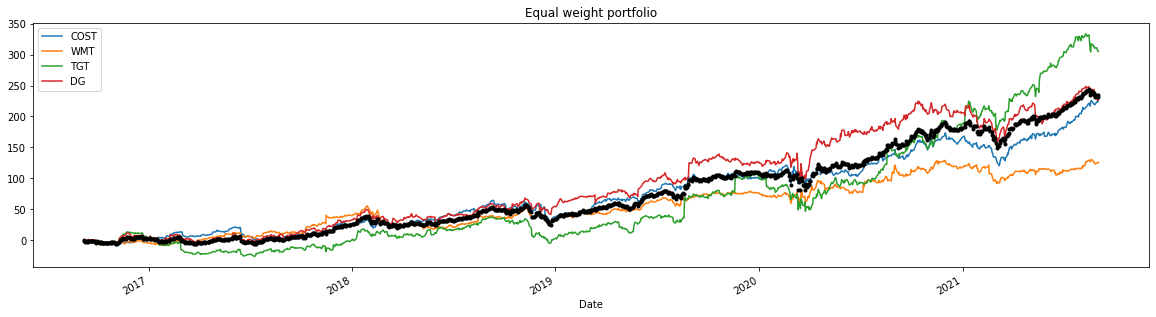

In [ ]:
equal_returns = np.dot(equal_weights,df['pct'].transpose())
# equal_returns

cum_equal_returns =   (1 + equal_returns).cumprod() - 1
# cum_equal_returns

cum_equal_returns_perc = pd.Series(100 * cum_equal_returns)
cum_equal_returns_perc.index = df.index

import matplotlib.pyplot as plt

ax = df['pct_cum'].mul(100).plot(figsize=(20,5))
cum_equal_returns_perc.plot(figsize=(20,5), lw=.1, ax=ax, color='black', linestyle='-.', marker='.')
plt.title('Equal weight portfolio');

In [ ]:
print("RETURN")
print(df['pct_cum'].iloc[-1].sort_values(ascending=False))
print(cum_equal_returns[-1])

RETURN
TGT     3.05132
DG      2.29165
COST    2.27169
WMT     1.25919
Name: 2021-09-02 00:00:00, dtype: float64
2.3403777213289936


In [ ]:
print("RISK")
print(df3.std().sort_values(ascending=False))
print("Our equal weight portfolio generated a risk of {}.".format(cum_equal_returns.std()))
print("With diversification, we were able to achieve overall return higher than DG, with risk level less than the top 2.")

RISK
TGT     0.909833
DG      0.770308
COST    0.597064
WMT     0.404523
dtype: float64
Our equal weight portfolio generated a risk of 0.6964404765581552.
With diversification, we were able to achieve overall return higher than DG, with risk level less than the top 2.


In [ ]:
def portfolio_return_ann(weights, log_ret):
  return np.dot(weights, log_ret.mean()) * 252

def portfolio_vol_ann(weights, log_ret_cov):
  cov_ann = np.dot(weights, log_ret_cov)
  vol = np.dot(weights.transpose(), cov_ann)
  return np.sqrt(vol)

In [ ]:
mc_portfolio_returns = []
mc_portfolio_vol = []
mc_weights = []
for sim in range(6000):
    # This may take awhile!
    weights = random_weights(N=4)
    mc_weights.append(weights)
    mc_portfolio_returns.append(portfolio_return_ann(weights,df4))
    mc_portfolio_vol.append(portfolio_vol_ann(weights,df4.cov()))

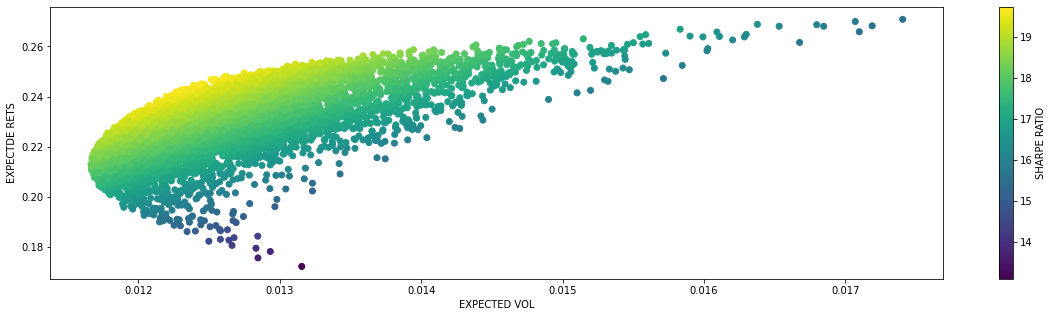

In [ ]:
mc_sharpe_ratios = np.array(mc_portfolio_returns)/np.array(mc_portfolio_vol)

plt.figure(figsize=(20,5))
plt.scatter(mc_portfolio_vol,mc_portfolio_returns,c=mc_sharpe_ratios)
plt.ylabel('EXPECTDE RETS')
plt.xlabel('EXPECTED VOL')
plt.colorbar(label="SHARPE RATIO");

In [ ]:
mc_weights[np.argmax(mc_sharpe_ratios)]

array([0.55119466, 0.00288661, 0.15854276, 0.28737598])

In [ ]:
from scipy.optimize import minimize

def function_to_minimize(weights):
    # Note -1* because we need to minimize this
    # Its the same as maximizing the positive sharpe ratio
    return -1 * (portfolio_return_ann(weights,df4)/portfolio_vol_ann(weights,df4.cov()))

bounds = tuple((0,1) for n in range(N))

# Need to constrain all weights to add up to 1
sum_constraint = ({'type': 'eq', 'fun': lambda weights: np.sum(weights)-1})

minimize(fun=function_to_minimize, x0=equal_weights, bounds=bounds, constraints=sum_constraint)

     fun: -19.765783276847273
     jac: array([ 2.31981277e-04,  9.26620007e-01,  1.49965286e-03, -1.67489052e-03])
 message: 'Optimization terminated successfully'
    nfev: 38
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([5.85114956e-01, 2.51534904e-17, 1.76200441e-01, 2.38684603e-01])

In [ ]:
minimize( lambda x: (x-3)**2 + 4, 0)

      fun: 4.000000000000001
 hess_inv: array([[0.5]])
      jac: array([5.96046448e-08])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([3.00000003])

## CAPM

In [ ]:
# !pip install yfinance
import yfinance as yf

start = '2009-12-31'
end = '2021-09-04'

tickers = ['AAPL', 'AMZN', 'GE', '^VIX', '^GSPC']
data = yf.download(tickers, start, end)['Adj Close'][tickers]

pd.concat([ data.iloc[-1] - data.iloc[0], (data.iloc[-1] - data.iloc[0]) /data.iloc[0] ], axis=1)

[*********************100%***********************]  5 of 5 completed


,0,1
AAPL,146.770723,22.878025
AMZN,167.176497,24.855263
GE,14.501671,0.217139
^VIX,-5.270000,-0.243081
^GSPC,3420.330200,3.067286


In [ ]:
class Animal:
  def __init__(self):
    self.eyes = 2
    self.mouth = 1
    self.__lay = 'Golden egg!'
    self.summon()

  def summon(self):
    print('Animal summoned!')

class Bird(Animal):
  def __init__(self):
    super().__init__()
    self.beak = 1
    self.mouth = 0
    self.color = 'yellow'

  def walk(self, steps=3):
    print('Waddle ' * steps)
  
  def __secret(self):
    print(self._Animal__lay)

a = Bird()
a.walk()
a._Bird__secret()

Animal summoned!
Waddle Waddle Waddle Waddle Waddle 
Golden egg!


In [ ]:
import numpy as np
import cv2 as cv
import random
from google.colab.patches import cv2_imshow

img = cv.imread('./test.png')

# print(type(img))
# print(img.shape)
# cv2_imshow(img)

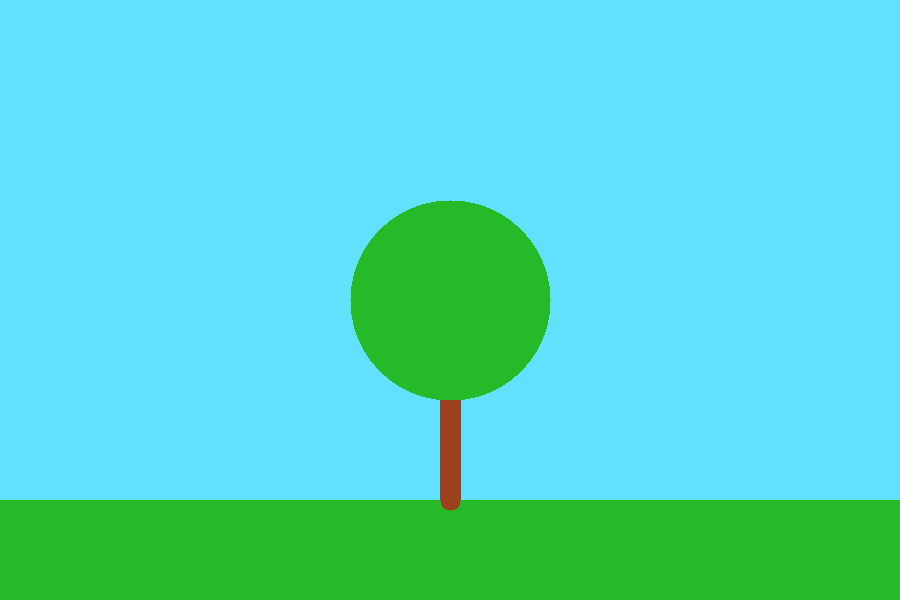

In [ ]:
# general parameters
width = 900
height = 600
n_trees = 30
ground_level = height-100

# colours
green, light_green, brown = (40,185,40),(25,220,0),(30,65,155)

# blank image
bg = np.zeros((height, width, 3), dtype=np.uint8)

# draw background
cv.rectangle(bg,(width,0), (0, ground_level), (255,225,95), -1)
cv.rectangle(bg,(width, ground_level), (0, height), green, -1)

# ***************
class Tree:
  def __init__(self, image, location):
    self.img = image
    self.loc = location
    self.ht = 300

  def draw(self):
    # trunk
    cv.line(self.img, (self.loc, ground_level), (self.loc, self.ht), brown, 20)
    # leaves
    cv.circle(self.img, (self.loc, self.ht), 100, green, -1)
    return
# ***************

#display image
img = Tree(bg, 450).draw()

cv2_imshow(bg)

# cv.waitKey(0)
# cv.destroyAllWindows()

In [ ]:
import numpy as np

data = np.random.randint(5,11,20, dtype=np.int8)
# type(data[2])
# print(data.var(ddof=1))
# sum((data - data.mean()) **2) /(len(data)-1)
np.histogram(data)

(array([3, 0, 4, 0, 3, 0, 5, 0, 2, 3]),
 array([ 5. ,  5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ]))